In [24]:
import os
from glob import glob
from scipy.io import loadmat # h5py returns error when loading .mat files coverted from .cxd files
import numpy as np
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
from pywavesurfer import ws
# from WC_ephys import *
from skimage.io import imsave
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import seaborn as sns

In [ ]:
# dataPath = '/Users/zhengj10/Desktop/201021/cell_4'
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/cell_3'
os.path.exists(dataPath)

In [ ]:
metaFiles = glob(dataPath+'/meta'+'/*meta.mat')
# os.mkdir(dataPath+'/meta')
# import shutil
# for metaFile in metaFiles:
#     shutil.move(metaFile,dataPath+'/meta')
# metaFiles


In [ ]:
matFiles = glob(dataPath+'/*.mat')
matFiles = sorted(matFiles)
h5Files = glob(dataPath+'/*.h5')
h5Files = sorted(h5Files)
print('*.mat files: %d' %len(matFiles))
print('*.h5 files: %d' %len(h5Files))


In [ ]:
F_all_trials = []
for matFile in matFiles:
    if matFile == '/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201027/cell_1/trial00007.mat':
        continue
    print(matFile)
    
    data = loadmat(matFile)
    imgData = data['data']
    F = []
    fb = np.min(imgData[:,0][1000])
    print(fb)
    for frame in range(imgData[:,0].shape[0]):
        if frame%1000 == 0:
            print(frame)
        
        F.append((np.mean(imgData[:,0][frame][:,240:272])-np.mean(imgData[:,0][1000][:,240:272]))/(np.mean(imgData[:,0][1000][:,240:272])-fb))
    F_all_trials.append(F)
    break


In [ ]:
plt.plot(F)
# data['data'].shape
# plt.imshow(imgData[0,0],cmap='gray',vmax=1800)
# imgData[1,0].shape

In [ ]:
plt

In [ ]:
import h5py
VSYNC_signal_all_trials = []
for h5File in h5Files:
    if h5File == '/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201027/cell_1/trial_0007.h5':
        continue
    print(h5File)
    data = h5py.File(h5File,'r')
    keys = []
    for k in data.keys():
#         print(k)
        keys.append(k)
    VSYNC_signal = data[keys[1]]['digitalScans'][()][0]
    VSYNC_signal_all_trials.append(VSYNC_signal)


In [ ]:
for i in range(len(F_all_trials)):
    print(len(F_all_trials[i]))

In [ ]:
F_all_trials_mean = np.mean(F_all_trials,axis=0)

In [ ]:
len(F_all_trials_mean)

In [ ]:
fig = plt.figure(figsize=[5,5])
# plt.plot(F_all_trials_mean[1595:1610])
x = np.linspace(0,2000,6400)
plt.plot(x[4810:4849]-x[4810]+1,F_all_trials_mean[4810:4849])
# plt.plot(x[100:-100],F_all_trials_mean[100:-100])
# plt.plot(x[1602:1640]-x[1602]+1,F_all_trials_mean[1602:1640])
plt.ylabel('F',size=14)
plt.xlabel('ms',size=14)
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201021/Voltron-ST_trace.png',dpi=1200)

plt.show()


In [ ]:
def func(x, a, b, c, d, e):
        # x = x.astype(np.float128)
        # a = a.astype(np.float128)
        # b = b.astype(np.float128)
        # c = c.astype(np.float128)
    y = -a * np.exp(-b * x) + -c * np.exp(-d * x) + e
        # y = y.astype(np.float128)
    return y


In [ ]:
1640-1592

In [ ]:
# x1 = x[1602:1640]-x[1602]
# x1 = x[4810:4849]-x[4810]

### activation
# trace_to_fit_voltron = F_all_trials_mean[1592:1640]
# trace_to_fit_voltron_2 = F_all_trials_mean[1592:1640]

trace_to_fit_voltron = F_all_trials_mean[4800:4848]
# trace_to_fit_voltron_2 = F_all_trials_mean[4800:4848]


trace_to_fit_voltron = trace_to_fit_voltron-trace_to_fit_voltron[0]
# trace_to_fit_voltron_2 = trace_to_fit_voltron_2-trace_to_fit_voltron_2[0]

### deactivation
# trace_to_fit_voltron = F_all_trials_mean[4810:4849]
# trace_to_fit_voltron_2 = trace_to_fit_voltron_2-trace_to_fit_voltron_2[0]
# trace_to_fit_voltron = trace_to_fit_voltron-trace_to_fit_voltron[0]


In [ ]:

### keep text format 
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import seaborn as sns
from matplotlib import font_manager
sns.set_style('whitegrid')
fig = plt.figure(figsize=[2.5,2])
ax = plt.subplot(111)

x1 = x[1592:1640]-x[1592]

ax.plot(x1,trace_to_fit_voltron,color='#336699',label='Voltron')
# ax.plot(x1,trace_to_fit_voltron_2,color='#FF3333',label='Voltron 2')

a

font = font_manager.FontProperties(weight='bold',style='normal')
leg = ax.legend(handlelength=0,handletextpad = -0.21,markerscale=0,frameon=False,prop=font)

for item in leg.legendHandles: # remove line marker in legend
    item.set_visible(False)

for artist, text in zip(leg.legendHandles, leg.get_texts()): # set text the same color as line
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)




ax.set_xlabel('ms')
ax.set_ylabel('\u0394F/F (%)')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/Voltron 2 paper/Voltron 2 paper_v6/2C_kinetics_traces_deactivation.pdf',format='pdf')
plt.show()


In [ ]:
# def func(x, a, b, c, d, e):
#         # x = x.astype(np.float128)
#         # a = a.astype(np.float128)
#         # b = b.astype(np.float128)
#         # c = c.astype(np.float128)
#     y = -a * np.exp(-b * x) + -c * np.exp(-d * x) + e
#         # y = y.astype(np.float128)
#     return y

from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x1, trace_to_fit,maxfev=5000)

In [ ]:
plt.plot(F_all_trials_mean[50:])

In [ ]:
fig = plt.figure()
plt.plot(x1, trace_to_fit, label='data')
plt.plot(x1, func(x1, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))
# plt.plot(x1, func(x1, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201021/act_kinetics.png',dpi=1200)
plt.show()


In [ ]:
tau_f = 1/popt[1]
tau_s = 1/popt[3]

In [ ]:
tau_f

In [ ]:
tau_s

In [ ]:
df

In [ ]:
percent = 1 - tuple(popt)[0]/(tuple(popt)[0]+tuple(popt)[2])
percent

In [ ]:
tau_f_deact_all.append(tau_s)
tau_s_deact_all.append(tau_f)
tau_f_deact_percent.append(percent)

In [ ]:
tau_f_deact_all

In [ ]:
tau_s_deact_all

In [ ]:
tau_f_deact_percent

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'Date':['201027','201027','201027','201027','201028','201028','201028','201028'],
    'Cell':['Cell_1','Cell_1','Cell_1','Cell_1','Cell_2','Cell_2','Cell_2','Cell_2'],
    'Sensor':['Voltron','Voltron','Voltron','Voltron','Voltron 2','Voltron 2','Voltron 2','Voltron 2'],
    'tau_f_act':tau_f_act_all,
    'tau_s_act':tau_s_act_all,
    'tau_f_act_percent':tau_f_act_percent,
    'tau_f_deact':tau_f_deact_all,
    'tau_s_deact':tau_s_deact_all,
    'tau_f_deact_percent':tau_f_deact_percent
})

### Plot analyzed data

In [40]:
# df.to_pickle('/Users/zhengj10/Desktop/Voltron 2 paper/Voltron 2 paper_v6/kinetics.pkl')
# df = pd.read_pickle('/Users/zhengj10/Desktop/GENIE/Manuscript/Voltron 2 paper/Voltron 2 paper_v10/kinetics.pkl')
df.to_pickle('/Volumes/genie/Jihong_GENIE_stuff/Manuscript/Voltron 2/Revision/kinetics.pkl')

In [41]:
df

,Date,Cell,Sensor,tau_f_act,tau_s_act,tau_f_act_percent,tau_f_deact,tau_s_deact,tau_f_deact_percent,dFF_trace
0,201027,Cell_1,Voltron,0.955512,4.032292,0.581620,1.161170,11.063581,0.587017,"[-0.43925033879248737, -0.292119636854352, -0...."
1,201027,Cell_2,Voltron,0.767470,2.468679,0.554365,1.261434,4.724830,0.605563,"[-0.42938512384548544, -0.3107943450411072, -0..."
2,201027,Cell_3,Voltron,0.987813,4.335913,0.640978,1.242117,5.448495,0.730667,"[-0.46398863650442357, -0.32382316179467735, -..."
3,201027,Cell_4,Voltron,0.690084,2.192778,0.351493,0.845082,3.847028,0.544379,"[-0.3970122911158257, -0.2909432657363799, -0...."
4,201028,Cell_1,Voltron 2,0.750454,7.880892,0.804088,0.700855,5.588473,0.437181,"[-0.4027446004087755, -0.2878710014778586, -0...."
5,201028,Cell_2,Voltron 2,0.681750,4.253009,0.814735,0.859425,3.929486,0.422558,"[-0.4038224342870991, -0.267761047825194, -0.2..."
6,201028,Cell_3,Voltron 2,0.639632,3.414511,0.750422,0.833970,4.341270,0.397631,"[-0.42508580126956724, -0.31706129672605754, -..."
7,201028,Cell_4,Voltron 2,0.615448,3.482160,0.771902,1.168270,5.100433,0.527317,"[-0.411937163574962, -0.27001792198165353, -0...."


In [4]:
def get_dff_trace(trace,fb):
    trace = np.array(trace)
    
    f0 = np.mean(trace[1000:1200])
    dff_trace = (trace-f0)/(f0-fb)

    return dff_trace

/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_1/trial00001.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_1/trial00002.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_1/trial00004.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_1/trial00007.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_1/trial00010.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_1/trial00011.mat
(6400, 16, 512)
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_2/trial00005.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_2/trial00007.mat
/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage/201027/Cell_2/trial00008.mat
/Volumes/genie/Jihong_GENIE_st

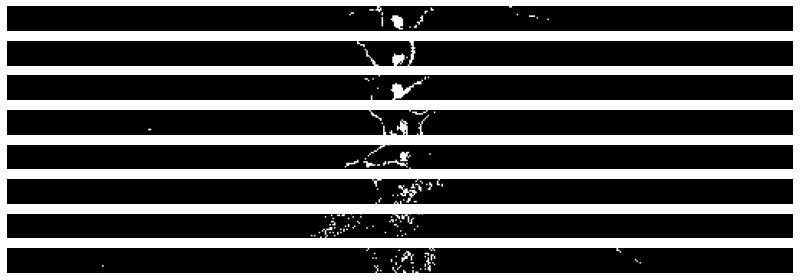

In [5]:
plt.figure(figsize=[12.8,4])
from scipy.stats import mannwhitneyu
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/Voltron_Kinetics_manual_patch_with_HCImage'

dFF_trace = []
s_p = 1

for i,r in df.iterrows():
    
    matFiles = glob(os.path.join(imgPath,r['Date'],r['Cell']) +'/*.mat')
    matFiles = sorted(matFiles)

    ImgData = []
    for matFile in matFiles:
        if matFile == '/Volumes/genie/Jihong_GENIE_stuff/Manual_HCImage/201027/cell_1/trial00007.mat':
            continue
        print(matFile)
        data = loadmat(matFile)
        imgData = data['data']
        
        Img = []
        for f in range(imgData[:,0].shape[0]):
            img = imgData[f,0]
            Img.append(img)
        imgData = np.array(Img)
        ImgData.append(imgData)
    imgData = np.mean(ImgData,axis=0)
    print(imgData.shape)

    p_val = []
    for row in range(16):
#         print(row)
        for c in range(512):
            a = imgData[1000:1200,row,c]
            b = imgData[3000:3200,row,c]
            stat, p = mannwhitneyu(a, b, alternative='two-sided')
            p_val.append(p)

    p_val_2d = np.reshape(p_val,[16,512])
    thre = sorted(p_val)[100] # Pick up 100 lowest p_val

    mask = p_val_2d<thre

    ax = plt.subplot(8,1,s_p)
    ax.imshow(mask,cmap='gray')
    ax.axis('off')


    savePath = os.path.join(imgPath,r['Date'],r['Cell'])
    if not os.path.exists(savePath):
        os.makedirs(savePath)
    np.save(savePath+'/'+os.path.basename(matFile).split('.')[0]+'_mask',mask)


    f_single_cell = []
    for frame in range(imgData.shape[0]):
        act_pix = imgData[frame,:,:]*mask
        f_single_frame = np.sum(act_pix)/np.sum(mask)
        f_single_cell.append(f_single_frame)

    fb = np.min(imgData)
    dff_trace = get_dff_trace(f_single_cell,fb)

    dFF_trace.append(dff_trace)
    
    s_p += 1
plt.tight_layout()
plt.show()

In [6]:
df = df.assign(dFF_trace=dFF_trace)
df

,Date,Cell,Sensor,tau_f_act,tau_s_act,tau_f_act_percent,tau_f_deact,tau_s_deact,tau_f_deact_percent,dFF_trace
0,201027,Cell_1,Voltron,0.955512,4.032292,0.581620,1.161170,11.063581,0.587017,"[-0.43925033879248737, -0.292119636854352, -0...."
1,201027,Cell_2,Voltron,0.767470,2.468679,0.554365,1.261434,4.724830,0.605563,"[-0.42938512384548544, -0.3107943450411072, -0..."
2,201027,Cell_3,Voltron,0.987813,4.335913,0.640978,1.242117,5.448495,0.730667,"[-0.46398863650442357, -0.32382316179467735, -..."
3,201027,Cell_4,Voltron,0.690084,2.192778,0.351493,0.845082,3.847028,0.544379,"[-0.3970122911158257, -0.2909432657363799, -0...."
4,201028,Cell_1,Voltron 2,0.750454,7.880892,0.804088,0.700855,5.588473,0.437181,"[-0.4027446004087755, -0.2878710014778586, -0...."
5,201028,Cell_2,Voltron 2,0.681750,4.253009,0.814735,0.859425,3.929486,0.422558,"[-0.4038224342870991, -0.267761047825194, -0.2..."
6,201028,Cell_3,Voltron 2,0.639632,3.414511,0.750422,0.833970,4.341270,0.397631,"[-0.42508580126956724, -0.31706129672605754, -..."
7,201028,Cell_4,Voltron 2,0.615448,3.482160,0.771902,1.168270,5.100433,0.527317,"[-0.411937163574962, -0.27001792198165353, -0...."


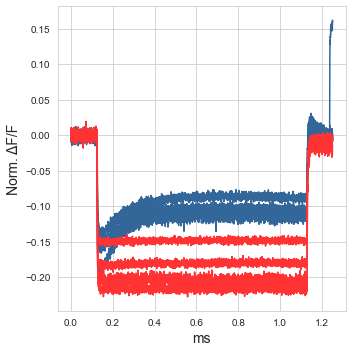

In [60]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style('whitegrid')
# fig = plt.figure(figsize=(4,2.75))
fig = plt.figure(figsize=(5,5))

x = np.linspace(0,2,6400)
x = (x[1592:1640]-x[1592])*1e3
ax = plt.subplot(111)
for i,r in df.iterrows():
    
    
    # entire dFF trace
    x = np.linspace(0,2,6400)
    x = x[1200:5200]-x[1200]
    dff = r['dFF_trace'][1200:5200]
#     dff = dff-dff[0]
#     dff = dff*-1/dff[-1] 
    
    
#     # Activation
#     dff = r['dFF_trace'][1592:1640]
#     dff = dff-dff[0]
#     dff = dff*-1/dff[-1]
    
    
#     # Deactivation
#     dff = r['dFF_trace'][4800:4848]
#     dff = dff-dff[0]
#     dff = dff/dff[-1]
    
    
    if r['Date'] == '201027':
        ax.plot(x,dff,color='#336699')
    else:
        ax.plot(x,dff,color='#FF3333')

        
#     dff = r['dFF_trace'][4800:4820]
#     dff = dff-dff[0]
#     dff = dff/dff[-1]
#     if r['Date'] == '201027':
#         ax.plot(dff,color='b')
#     else:
#         ax.plot(dff,color='r')   


        
        
#     if r['Date'] == '201027':
#         ax.plot(r['dFF_trace'][1595:1625]*-1/r['dFF_trace'][1625],color='b')
#     else:
#         ax.plot(r['dFF_trace'][1595:1625]*-1/r['dFF_trace'][1625],color='r')

# ax.set_ylim([-0.2474102699236042, 0.02])

ax.set_xlabel('ms',size=14)
ax.set_ylabel('Norm. \u0394F/F',size=14)
plt.tight_layout()
# plt.savefig()
plt.show()


In [61]:
ax.get_ylim()

(-0.2474102699236042, 0.18126438391049687)

In [ ]:

### keep text format 
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import seaborn as sns
from matplotlib import font_manager
sns.set_style('whitegrid')
fig = plt.figure(figsize=[2.5,2])
ax = plt.subplot(111)

x1 = x[1592:1640]-x[1592]

ax.plot(x1,trace_to_fit_voltron,color='#336699',label='Voltron')
# ax.plot(x1,trace_to_fit_voltron_2,color='#FF3333',label='Voltron 2')



font = font_manager.FontProperties(weight='bold',style='normal')
leg = ax.legend(handlelength=0,handletextpad = -0.21,markerscale=0,frameon=False,prop=font)

for item in leg.legendHandles: # remove line marker in legend
    item.set_visible(False)

for artist, text in zip(leg.legendHandles, leg.get_texts()): # set text the same color as line
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)
ax.set_xlabel('ms')
ax.set_ylabel('\u0394F/F (%)')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/Voltron 2 paper/Voltron 2 paper_v6/2C_kinetics_traces_deactivation.pdf',format='pdf')
plt.show()

In [ ]:
### keep text format 
import matplotlib
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.reset_orig()

fig = plt.figure(figsize=(4,2.75))

params = ['tau_f_act','tau_s_act','tau_f_act_percent','tau_f_deact','tau_s_deact','tau_f_deact_percent']
y_labels = ['_fast (ms)','_slow (ms)','% fast','_fast (ms)','_slow (ms)','% fast']

sensors = df.Sensor.unique()
for f in range(len(params)):
    ax = plt.subplot(2,3,f+1)
    individual_points = []
    mean_all = []
    sem_all = []
    labels = []
    for sensor in sensors:
#         if sensor == 'N4':
#             continue
        df_sensor = df[df.Sensor == sensor]
        param_mean = np.nanmean(df_sensor[params[f]].tolist(), axis=0)
        param_sem = np.nanstd(df_sensor[params[f]].tolist(), axis=0)/np.sqrt(len(df_sensor))
        individual_points.append(df_sensor[params[f]].tolist())
        mean_all.append(param_mean)
        sem_all.append(param_sem)
        labels.append(sensor)

    

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    y_pos = np.arange(1, len(sensors)+1)
#     if f>2:
# #         plt.xticks(y_pos, sensors, rotation=45, ha = 'right')
#         plt.xticks(y_pos, labels, rotation=45, ha = 'right')
    
#     else:
    plt.xticks(y_pos, [])

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

    if f not in [2,5]:
        ax.set_ylabel('\u03C4'+y_labels[f])
    else:
        ax.set_ylabel(y_labels[f])
    
    ax.scatter([[1,1,1,1],[2,2,2,2]],individual_points,color='k',zorder=1,alpha=0.75)
    barlist = ax.bar(y_pos,mean_all,yerr = sem_all,color = ['#336699', '#FF3333'],edgecolor = "black",
                     linewidth=2,zorder=-1)

#     print(params[f])
#     print(mean_all)
#     print(sem_all)
    
#     colors = ['#336699', '#FF3333']
#     for xtick, color in zip(ax.get_xticklabels(), colors):
#         xtick.set_color(color)
#     barlist[0].set_color('m')
#     barlist[1].set_color('c')
    # barlist[2].set_color('m')
    # barlist[3].set_color('c')
    # barlist[4].set_color('g')
    # barlist[5].set_color('r')
    # barlist[6].set_color('b')
    # barlist[7].set_color('brown')
    # plt.rcParams["axes.labelweight"] = "bold"
    # if params[f] in['tau_off_s_double']:
      #  ax.set_ylim([0,1200])
# plt.xticks(y_pos, labels, rotation=30, ha = 'right')
# plt.text(1.822,0.45, '*',size=20)
# plt.text(1.822,2, '*',size=20)
plt.tight_layout()

fig.savefig('/Users/zhengj10/Desktop/Post_submission/2e_kinetics.pdf',format='pdf')
plt.show()


In [ ]:
ax.scatter?

In [ ]:
# ax.get_xlim()
df.Sensor.unique()

### Statistics

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
p_val = {}

for param in df.columns:

    a = df[df['Sensor']=='Voltron'][param].to_list()
    b = df[df['Sensor']=='Voltron 2'][param].to_list()
    stat, p = mannwhitneyu(a, b, alternative='two-sided')
    p_val[param] = p

In [ ]:
p_val

In [ ]:
# df.loc[0]
df

In [ ]:
df['Cell'] = ['Cell_1','Cell_2','Cell_3','Cell_4','Cell_1','Cell_2','Cell_3','Cell_4']

In [ ]:
df